# WeatherPy
## by Eric Hagee

This notebook looks at the weather of a number of random cities around the world and compares several features as a function of latitude.  Namely, it considers temperature, humidity, cloudiness, and wind speed.  This data is retrieved from the Open Weather API, whose documentation can be found at: https://openweathermap.org/current
As well, the CitiPy library is used, whose documentation can be found at: https://github.com/wingchen/citipy

### Getting Started

First, we need to set up a number of dependencies and variables.

In [81]:
#import dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
import requests
from pprint import pprint

from citipy import citipy

#import api key
from config import api_key

In [82]:
#set up longitude and latitude range
lat_range = (-90, 90)
long_range = (-180, 180)

In [83]:
#set up an output file to send the cities list to
cities_path = os.path.join('.', 'Resources', 'cities.csv')

### Getting the Cities
To get a random distribution of cities around the world, we generate both random latitudes and longitudes around the world.

In [84]:
#generate empty lists of cities and coordinates
coords = []
cities = []

#generate random latitudes and longitudes
lats = np.random.uniform(low = -90.0000, high = 90.0000, size = 3000)
longs = np.random.uniform(low = -180.0000, high = 180.0000, size = 3000)

#combine the latitudes and longitudes as coordinates
coords = zip(lats, longs)

We will now use the CitiPy library to find the nearest city to each set of latitude and longitude.  We will save the city name and country code to send to the Open Weather API. 

In [85]:
#Cycle through coordinate list
for coord in coords:
    #get nearest city
    city = citipy.nearest_city(coord[0], coord[1])
    
    #get city name and country code
    city_tuple = (city.city_name, city.country_code)
    
    #if city is unique, add to list
    if city_tuple not in cities:
        cities.append(city_tuple)
        
#Print the number of cities
print(f"We found data for {len(cities)} unique cities.")

We found data for 1018 unique cities.


### Get the Weather Data
Now, we need to access the current weather for each of these unique cities.  We send the city name and country code to the API for each city.  We print out a message for each city and save the values of interest.  If there is an error, we skip that city.

In [86]:
#create an empty list to hold data
city_data = []

#save the base url
base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

In [87]:
#set up a variable to divide the list of cities into sets (to not use up API limits)
set_size = 25

#calcualte number of sets
set_limit = len(cities)//set_size

In [88]:
#print beginning message
print('''Beginnning Data Retrieval:
-------------------''')
#loop through all sets
for i in range(0, set_limit + 1):
    #calculate start index:
    start_index = (set_size * i)
    end_index = (set_size * i) + set_size
    
    #check if end of loop (avoid index error)
    if (end_index >= len(cities)):
        end_index = len(cities)

    #loop through set
    for idx in range(start_index, end_index):
        #get index
        j = idx - start_index
        
        #get city name and country code
        city_name = cities[idx][0]
        country_code = cities[idx][1]
        
        #print message
        print(f"Printing city {j} of set {i} | {city_name},{country_code}")
        
        #set up url
        query_url = f"{base_url}{city_name},{country_code}"
        
        #get weather in json format
        weather_json = requests.get(query_url).json()
        
        #make an empty dictionary to hold
        data = {}
        
        #fill dictionary with appropriate error handling
        try:
            data['City'] = weather_json['name']
            data['Country'] = weather_json['sys']['country']
            data['Latitude'] = weather_json['coord']['lat']
            data['Longitude'] = weather_json['coord']['lon']
            data['Date Updated'] = weather_json['dt']
            data['Max Temperature (F)'] = weather_json['main']['temp_max']
            data['Humidity (%)'] = weather_json['main']['humidity']
            data['Cloudiness (%)'] = weather_json['clouds']['all']
            data['Wind Speed (mph)'] = weather_json['wind']['speed']
            city_data.append(data)
        except (KeyError, IndexError):
            print(f"Error: skipping {city_name},{country_code}")

    #set a timer to not go over any API limits
    time.sleep(1)
        
#print end message
print('''--------------
Data Retrieval Complete''')

Beginnning Data Retrieval:
-------------------
Printing city 0 of set 0 | san carlos de bariloche,ar
Printing city 1 of set 0 | praia,cv
Printing city 2 of set 0 | lavrentiya,ru
Printing city 3 of set 0 | nantucket,us
Printing city 4 of set 0 | charters towers,au
Printing city 5 of set 0 | atuona,pf
Printing city 6 of set 0 | gat,ly
Error: skipping gat,ly
Printing city 7 of set 0 | dikson,ru
Printing city 8 of set 0 | bayan,kw
Printing city 9 of set 0 | butaritari,ki
Printing city 10 of set 0 | altamont,us
Printing city 11 of set 0 | mar del plata,ar
Printing city 12 of set 0 | tomatlan,mx
Printing city 13 of set 0 | tautira,pf
Printing city 14 of set 0 | new norfolk,au
Printing city 15 of set 0 | khonuu,ru
Error: skipping khonuu,ru
Printing city 16 of set 0 | sabang,id
Printing city 17 of set 0 | emerald,au
Printing city 18 of set 0 | musafirkhana,in
Printing city 19 of set 0 | bluff,nz
Printing city 20 of set 0 | cidreira,br
Printing city 21 of set 0 | bubaque,gw
Printing city 22 of 

Printing city 10 of set 7 | floro,no
Printing city 11 of set 7 | vestmannaeyjar,is
Printing city 12 of set 7 | formoso do araguaia,br
Error: skipping formoso do araguaia,br
Printing city 13 of set 7 | tahoua,ne
Printing city 14 of set 7 | kurovskoye,ru
Printing city 15 of set 7 | burgas,bg
Printing city 16 of set 7 | pangai,to
Printing city 17 of set 7 | yar-sale,ru
Printing city 18 of set 7 | kodiak,us
Printing city 19 of set 7 | keningau,my
Printing city 20 of set 7 | saldanha,za
Printing city 21 of set 7 | visnes,no
Printing city 22 of set 7 | beringovskiy,ru
Printing city 23 of set 7 | mackenzie,ca
Printing city 24 of set 7 | vanavara,ru
Printing city 0 of set 8 | los llanos de aridane,es
Printing city 1 of set 8 | muroto,jp
Printing city 2 of set 8 | puerto ayora,ec
Printing city 3 of set 8 | santa cruz,cr
Printing city 4 of set 8 | balassagyarmat,hu
Printing city 5 of set 8 | port moresby,pg
Printing city 6 of set 8 | lebu,cl
Printing city 7 of set 8 | teruel,es
Printing city 8 o

Printing city 21 of set 14 | sibolga,id
Printing city 22 of set 14 | golden gate,us
Printing city 23 of set 14 | mana,gf
Printing city 24 of set 14 | svencionys,lt
Printing city 0 of set 15 | lata,sb
Error: skipping lata,sb
Printing city 1 of set 15 | liku,wf
Error: skipping liku,wf
Printing city 2 of set 15 | port hedland,au
Printing city 3 of set 15 | ormara,pk
Printing city 4 of set 15 | talaya,ru
Printing city 5 of set 15 | severo-yeniseyskiy,ru
Printing city 6 of set 15 | golspie,gb
Printing city 7 of set 15 | san andres,co
Printing city 8 of set 15 | acapulco,mx
Printing city 9 of set 15 | beira,mz
Printing city 10 of set 15 | salalah,om
Printing city 11 of set 15 | nemuro,jp
Printing city 12 of set 15 | lompoc,us
Printing city 13 of set 15 | bathsheba,bb
Printing city 14 of set 15 | mamallapuram,in
Printing city 15 of set 15 | malpe,in
Printing city 16 of set 15 | ilulissat,gl
Printing city 17 of set 15 | le port,re
Printing city 18 of set 15 | puerto leguizamo,co
Printing city 

Printing city 10 of set 22 | itoman,jp
Printing city 11 of set 22 | ous,ru
Printing city 12 of set 22 | russell,nz
Printing city 13 of set 22 | tungor,ru
Printing city 14 of set 22 | mogadishu,so
Printing city 15 of set 22 | balaipungut,id
Printing city 16 of set 22 | bad liebenwerda,de
Printing city 17 of set 22 | mahajanga,mg
Printing city 18 of set 22 | tiksi,ru
Printing city 19 of set 22 | duki,pk
Printing city 20 of set 22 | cumaribo,co
Error: skipping cumaribo,co
Printing city 21 of set 22 | arcata,us
Printing city 22 of set 22 | asau,tv
Error: skipping asau,tv
Printing city 23 of set 22 | battle creek,us
Printing city 24 of set 22 | teya,ru
Printing city 0 of set 23 | ekibastuz,kz
Printing city 1 of set 23 | ambunti,pg
Printing city 2 of set 23 | novyy urengoy,ru
Printing city 3 of set 23 | sola,vu
Printing city 4 of set 23 | weligama,lk
Printing city 5 of set 23 | moree,au
Printing city 6 of set 23 | troina,it
Printing city 7 of set 23 | assomada,cv
Printing city 8 of set 23 | 

Printing city 24 of set 29 | abyek,ir
Printing city 0 of set 30 | rairangpur,in
Printing city 1 of set 30 | tres arroyos,ar
Printing city 2 of set 30 | jinchang,cn
Printing city 3 of set 30 | avera,pf
Error: skipping avera,pf
Printing city 4 of set 30 | trelew,ar
Printing city 5 of set 30 | guane,cu
Printing city 6 of set 30 | ardakan,ir
Printing city 7 of set 30 | asyut,eg
Printing city 8 of set 30 | meulaboh,id
Printing city 9 of set 30 | uyuni,bo
Printing city 10 of set 30 | bertinoro,it
Printing city 11 of set 30 | wahran,dz
Error: skipping wahran,dz
Printing city 12 of set 30 | manggar,id
Printing city 13 of set 30 | bonito,br
Printing city 14 of set 30 | sidrolandia,br
Printing city 15 of set 30 | louisbourg,ca
Error: skipping louisbourg,ca
Printing city 16 of set 30 | cockburn town,bs
Printing city 17 of set 30 | nanlong,cn
Printing city 18 of set 30 | moundou,td
Printing city 19 of set 30 | zachagansk,kz
Error: skipping zachagansk,kz
Printing city 20 of set 30 | dharchula,in
Pr

Printing city 10 of set 37 | baykit,ru
Printing city 11 of set 37 | marshfield,us
Printing city 12 of set 37 | sterlibashevo,ru
Printing city 13 of set 37 | shenjiamen,cn
Printing city 14 of set 37 | bako,et
Printing city 15 of set 37 | sarakhs,ir
Printing city 16 of set 37 | lere,ng
Printing city 17 of set 37 | imeni poliny osipenko,ru
Printing city 18 of set 37 | madison,us
Printing city 19 of set 37 | jizan,sa
Printing city 20 of set 37 | kulhudhuffushi,mv
Printing city 21 of set 37 | khandyga,ru
Printing city 22 of set 37 | westport,ie
Printing city 23 of set 37 | puksoozero,ru
Printing city 24 of set 37 | tongren,cn
Printing city 0 of set 38 | washington,us
Printing city 1 of set 38 | guanica,us
Error: skipping guanica,us
Printing city 2 of set 38 | leua,ao
Printing city 3 of set 38 | ewa beach,us
Printing city 4 of set 38 | nguiu,au
Error: skipping nguiu,au
Printing city 5 of set 38 | buala,sb
Printing city 6 of set 38 | skhisma,gr
Printing city 7 of set 38 | kajaani,fi
Printing 

### Conversion and Saving of Data
Now, we can convert the data we have retrieved into a pandas dataframe for easy plotting.  We can also save the data as a csv file.

In [89]:
#make a data frame
cities_df = pd.DataFrame(city_data)

#visualize
cities_df.head()

,City,Cloudiness (%),Country,Date Updated,Humidity (%),Latitude,Longitude,Max Temperature (F),Wind Speed (mph)
0,San Carlos de Bariloche,0,AR,1536955200,18,-41.13,-71.31,62.60,24.16
1,Praia,90,CV,1536955200,88,14.92,-23.51,78.80,11.41
2,Lavrentiya,100,RU,1536958319,93,65.58,-170.99,49.10,21.07
3,Nantucket,1,US,1536956100,68,41.28,-70.10,75.92,10.29
4,Charters Towers,0,AU,1536958320,88,-20.07,146.27,55.22,2.73


In [90]:
#check for empty values
cities_df.count()

City                   886
Cloudiness (%)         886
Country                886
Date Updated           886
Humidity (%)           886
Latitude               886
Longitude              886
Max Temperature (F)    886
Wind Speed (mph)       886
dtype: int64

In [91]:
#save the list of cities
cities_df.to_csv(cities_path, index = False, encoding = 'utf-8')

### Plotting Data


We intend to make four plots:
 - Temperature (F) vs. Latitude
 - Humidity (%) vs. Latitude
 - Cloudiness (%) vs. Latitude
 - Wind Speed (mph) vs. Latitude

#### Temperature vs. Latitude Plot

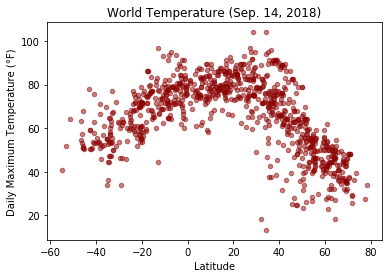

In [94]:
#make the plot
cities_df.plot.scatter('Latitude', 'Max Temperature (F)', 
                       c = 'darkred', alpha = 0.5, title = 'World Temperature (Sep. 14, 2018)')

#plot axis labels
plt.xlabel('Latitude')
plt.ylabel(f'Daily Maximum Temperature ({chr(176)}F)')

#save plot
plt.savefig(os.path.join('.', 'Resources', 'Temperature_Plot.png'))

#plot figure
plt.show()

#### Humidity vs. Latitude Plot

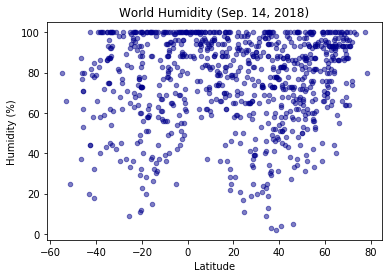

In [95]:
#make the plot
cities_df.plot.scatter('Latitude', 'Humidity (%)', 
                       c = 'darkblue', alpha = 0.5, title = 'World Humidity (Sep. 14, 2018)')

#plot axis labels
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')

#save plot
plt.savefig(os.path.join('.', 'Resources', 'Humidity_Plot.png'))

#plot figure
plt.show()

#### Cloudiness vs. Latitude Plot

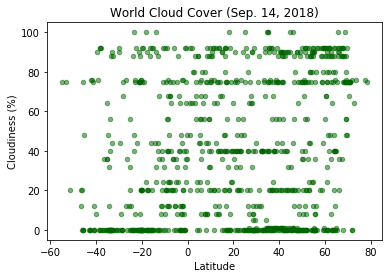

In [96]:
#make the plot
cities_df.plot.scatter('Latitude', 'Cloudiness (%)', 
                       c = 'darkgreen', alpha = 0.5, title = 'World Cloud Cover (Sep. 14, 2018)')

#plot axis labels
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')

#save plot
plt.savefig(os.path.join('.', 'Resources', 'Cloudiness_Plot.png'))

#plot figure
plt.show()

#### Wind Speed vs. Latitude Plot

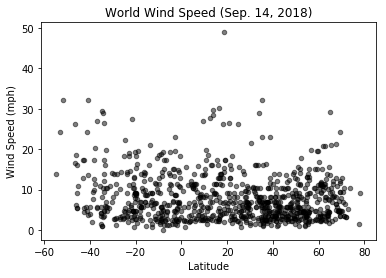

In [97]:
#make the plot
cities_df.plot.scatter('Latitude', 'Wind Speed (mph)', 
                       c = 'black', alpha = 0.5, title = 'World Wind Speed (Sep. 14, 2018)')

#plot axis labels
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (mph)')

#save plot
plt.savefig(os.path.join('.', 'Resources', 'Wind_Speed_Plot.png'))

#plot figure
plt.show()

### Analysis

We see some fairly obvious trends:
 - We see some relationship between daily maximum temperature and latitude.  As we would expect, temperatures cool towards the poles (+/- 90 degrees latitude).
 - As well, the actual peak of the curve is at about 30 degrees North.  This is not particularly surprising, as we are at the end of the northern summer.
 - Humidity does not seem to have any real dependence on latitude.  One hypothesis is that it likely has to do with proximity to oceans.
 - Cloudiness also has no real dependence on latitude.  We see bands at about 90%, 75%, 40%, 20%, and 0% cloud cover.  Likely, the recording method for this is somewhat inexact.
 - Wind speed shows no dependence on latitude, it seems, except for the most southern cities all experiencing higher than average wind speeds.  It could just be that all those cities are actually close to each other with stormy weather.
 - One of the cities is experiencing nearly 50 mph winds, which are tropical storm strength (though below hurricane strength).  See: http://www.aoml.noaa.gov/hrd/tcfaq/A5.html
 - We see a lot more northern hemisphere cities than southern hemisphere cities, though this is naturally due to most of the world's land being in the northern hemisphere (i.e. we do not have underwater cities).
 - Also, there is a northern and southern extreme above (about 80 degrees North) and below (about 60 degrees South) upon which we find no cities, due to the Arctic Ocean and Antarctica, respectively.